In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Iris data SVM 

In [2]:
##讀取鳶尾花資料
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [3]:
iris = load_iris()

In [35]:
pd.DataFrame(iris.data,columns=iris.feature_names).head(7)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3


In [4]:
x = iris.data
y = iris.target

In [5]:
##分類想要比對的特徵
X1 = x[:,:2]
X2 = x[:,2:]
X3 = x[:,::2]
X4 = x[:,::-2]
X5 = x[:,1:3]
X6 = x[:,0:4:3]
Y = y

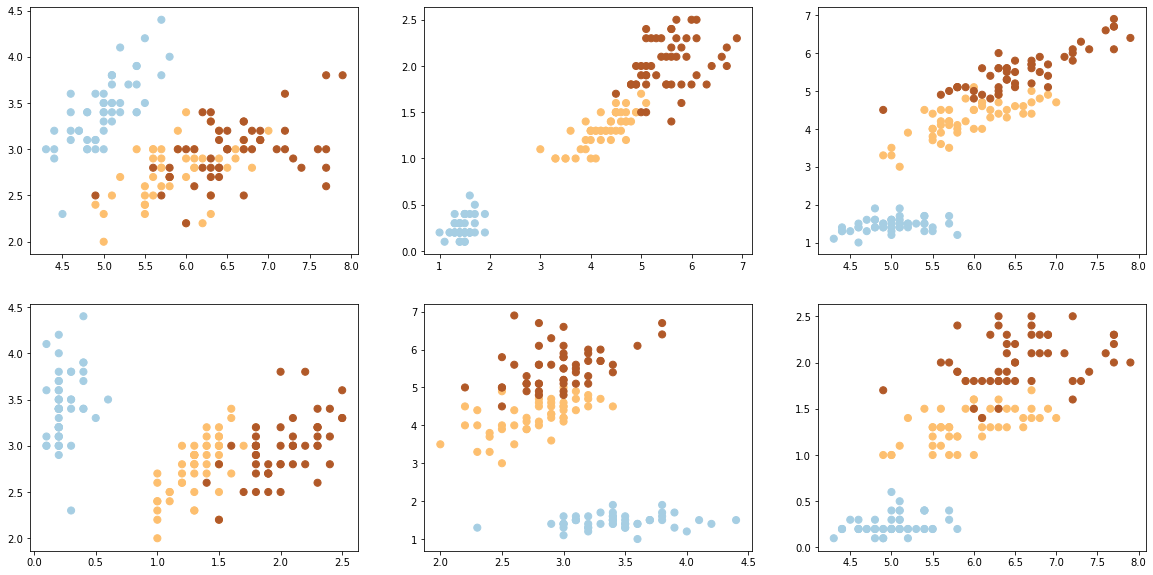

In [6]:
##透過資料視覺化觀察比較有鑑別度的特徵
plt.figure(figsize=(20,10))
plt.subplot(2,3,1)
plt.scatter(X1[:,0], X1[:,1], s=50, c=Y,cmap = 'Paired')
plt.subplot(2,3,2)
plt.scatter(X2[:,0], X2[:,1], s=50, c=Y,cmap = 'Paired')
plt.subplot(2,3,3)
plt.scatter(X3[:,0], X3[:,1], s=50, c=Y,cmap = 'Paired')
plt.subplot(2,3,4)
plt.scatter(X4[:,0], X4[:,1], s=50, c=Y,cmap = 'Paired')
plt.subplot(2,3,5)
plt.scatter(X5[:,0], X5[:,1], s=50, c=Y,cmap = 'Paired')
plt.subplot(2,3,6)
plt.scatter(X6[:,0], X6[:,1], s=50, c=Y,cmap = 'Paired');

###  選定花瓣寬度、長度作為分類的特徵

### SVC

In [7]:
from sklearn.svm import SVC

In [8]:
clf = SVC(gamma = 'auto')

In [9]:
##分類訓練資料、測試資料
x_train, x_test, y_train, y_test = train_test_split(X2, Y,
                                                   test_size=0.2,
                                                   random_state=0)

In [11]:
clf.fit(x_train, y_train)
Y2_predict = clf.predict(x_test)

C:\anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


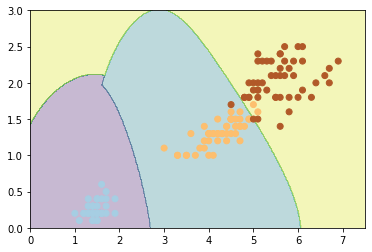

In [14]:
##視覺化訓練結果
x0 = np.linspace(0, 7.5, 500)
y0 = np.linspace(0, 3, 500)

xm, ym = np.meshgrid(x0, y0)
P = np.c_[xm.ravel(), ym.ravel()]
z = clf.predict(P)
Z = z.reshape(xm.shape)
plt.contourf(xm, ym, Z, alpha=0.3)

plt.scatter(X2[:,0], X2[:,1], c=Y,cmap='Paired')

In [15]:
from sklearn.metrics import precision_score

In [17]:
##計算準確率
precision_score(y_test,Y2_predict,pos_label='positive',average='micro')

C:\anaconda\lib\site-packages\sklearn\metrics\classification.py:1259: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


1.0

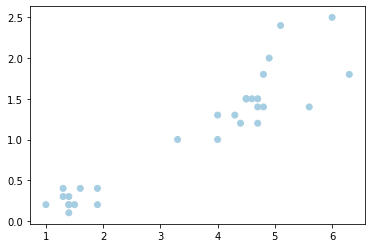

In [18]:
##視覺化準確程度
plt.scatter(x_test[:,0] , x_test[:,1] , c=Y2_predict-y_test, cmap = 'Paired') ;